In [2]:
import anthropic
import base64
import json
import pandas as pd
import ast         # for conversion str to dictionary
import matplotlib.pyplot as plt

In [3]:
# pip install anthropic

In [4]:
# get api_key from file (it is saved in format "api_key: 123456 #comment")
with open('api_key.txt') as fh:
    api_key = fh.readline() \
                     .split(':')[1].split()[0]


client = anthropic.Anthropic(api_key = api_key)

# api_key

In [5]:
def upload_image_from_disk(path_to_image):
    # read the image file from disk and encode it to base64 string
    with open(path_to_image, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

    return encoded_image


path_to_image = 'input\\Life expectancy in mice.png'
encoded_image = upload_image_from_disk(path_to_image)
# encoded_image[-100:]

<br>
<br>

In [10]:
def prompt_Claude(client,
                  system = "",
                  prompt = "",
                  encoded_image = ""):

    response = client.messages.create(
        model="claude-3-5-sonnet-20240620",
        max_tokens=1000,
        temperature=0,
        system=system,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt
                    },
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/png",
                            "data": encoded_image
                        }
                    }
                ]
            }
        ]
    )

    return response


system = ""
prompt = "This is a chart with several curves. For each curve, identify coordinates on the chart where the curve changes value. " + \
          "Answer must in the form of a Python dictionary. Return only the dictionary, don't round the values."

response = prompt_Claude(client=client, system=system, prompt=prompt, encoded_image=encoded_image)
response

Message(id='msg_01AfPa9tqa6fSgh6QsUhKxfL', content=[TextBlock(text='{\n    "TRE-OSK": [\n        (124, 100),\n        (132, 95),\n        (135, 85),\n        (137, 75),\n        (139, 65),\n        (141, 55),\n        (142, 50),\n        (145, 45),\n        (147, 40),\n        (150, 35),\n        (153, 20),\n        (156, 15),\n        (159, 10),\n        (164, 5),\n        (168, 0)\n    ],\n    "Control-Dox": [\n        (124, 95),\n        (126, 90),\n        (128, 85),\n        (130, 75),\n        (132, 65),\n        (134, 55),\n        (136, 45),\n        (138, 40),\n        (140, 30),\n        (142, 20),\n        (144, 15),\n        (146, 10),\n        (148, 5),\n        (152, 0)\n    ],\n    "Jax historical": [\n        (124, 95),\n        (126, 90),\n        (128, 85),\n        (130, 75),\n        (132, 65),\n        (134, 55),\n        (136, 50),\n        (138, 45),\n        (140, 35),\n        (142, 30),\n        (144, 25),\n        (146, 20),\n        (148, 15),\n        (150,

In [12]:
response_text = response.content[0].text
dd = ast.literal_eval(response_text)
dd

{'TRE-OSK': [(124, 100),
  (132, 95),
  (135, 85),
  (137, 75),
  (139, 65),
  (141, 55),
  (142, 50),
  (145, 45),
  (147, 40),
  (150, 35),
  (153, 20),
  (156, 15),
  (159, 10),
  (164, 5),
  (168, 0)],
 'Control-Dox': [(124, 95),
  (126, 90),
  (128, 85),
  (130, 75),
  (132, 65),
  (134, 55),
  (136, 45),
  (138, 40),
  (140, 30),
  (142, 20),
  (144, 15),
  (146, 10),
  (148, 5),
  (152, 0)],
 'Jax historical': [(124, 95),
  (126, 90),
  (128, 85),
  (130, 75),
  (132, 65),
  (134, 55),
  (136, 50),
  (138, 45),
  (140, 35),
  (142, 30),
  (144, 25),
  (146, 20),
  (148, 15),
  (150, 10),
  (154, 5),
  (162, 0)]}

In [13]:
ls_curves = []
for k,v in dd.items():
    ls_curves.append(pd.Series(data= [tp[0] for tp in v],
                               index=[tp[1] for tp in v],
                               name=k)
                    )

len(ls_curves)

3

In [14]:
ls_curves[0]

100    124
95     132
85     135
75     137
65     139
55     141
50     142
45     145
40     147
35     150
20     153
15     156
10     159
5      164
0      168
Name: TRE-OSK, dtype: int64

<br>
<br>

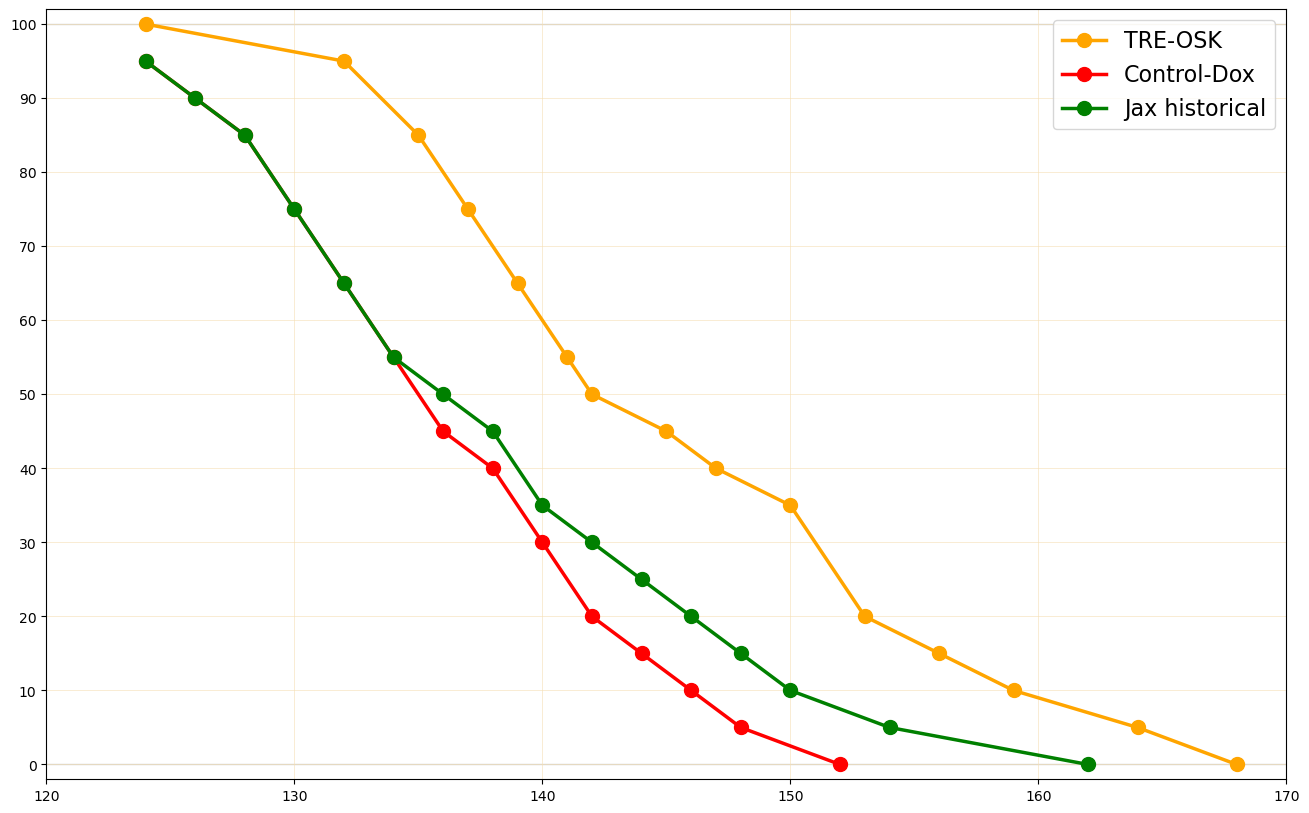

In [20]:
def create_chart(ls):
    plt.rcParams['figure.figsize'] = (16, 10)

    plt.ylim(-2, 102)
    labels_y = range(0, 101, 10)
    plt.yticks(labels_y)

    plt.xlim(120, 170)
    
    plt.grid(color='wheat', linewidth=0.4)
    plt.axhline(y=0, color='lightgrey', linewidth=1, zorder=0)
    plt.axhline(y=100, color='lightgrey', linewidth=1, zorder=0)

    ls_colors = ['orange', 'red', 'green', 'blue', 'purple', 'indigo']

    for i, ser in enumerate(ls):
        plt.plot(ser.values, ser.index, marker='.', markersize=20,
                 linestyle='-', label=ser.name, linewidth=2.5, alpha=1, color=ls_colors[i])

    plt.legend(loc='upper right', fontsize=16)

    plt.savefig(f"chart analysis//chart from extracted points.png",
            bbox_inches='tight', transparent=True, pad_inches=0.05)  # facecolor='white'
    
    plt.show()


create_chart(ls_curves)

In [22]:
ls_curves[0].index

Index([100, 95, 85, 75, 65, 55, 50, 45, 40, 35, 20, 15, 10, 5, 0], dtype='int64')

In [24]:
ls_curves[1].index

Index([95, 90, 85, 75, 65, 55, 45, 40, 30, 20, 15, 10, 5, 0], dtype='int64')

In [26]:
ls_curves[2].index

Index([95, 90, 85, 75, 65, 55, 50, 45, 35, 30, 25, 20, 15, 10, 5, 0], dtype='int64')

In [28]:
ls_curves[0].values

array([124, 132, 135, 137, 139, 141, 142, 145, 147, 150, 153, 156, 159,
       164, 168], dtype=int64)

In [31]:
ls_curves[1].values

array([124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       152], dtype=int64)

In [34]:
ls_curves[2].values

array([124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 154, 162], dtype=int64)